# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]

In [5]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [7]:
# Defining the problem
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [8]:
train, test = train_test_split(df)

In [9]:
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
4711,-0.525664,12.0000,-0.398512,1.087407,0.990651,-0.365010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2878,-0.114215,58.4922,0.858240,-0.132473,-0.874757,-1.652584,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
131,-0.540100,4.9900,-0.342657,-0.132473,-0.045687,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
7288,-0.162337,36.5878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8868,2.259435,181.8700,0.076261,0.216064,0.783383,0.761617,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     526.6
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:16:06   Log-Likelihood:                -40557.
No. Observations:                8152   AIC:                         8.130e+04
Df Residuals:                    8057   BIC:                         8.197e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7184      1.721     37.608      0.000      61.345      68.092
piece_count                                         73.2005      0.911     80.334      0.000      71.414      74.987
num_reviews                                          6.4159      0.699      9.180      0.000       5.046       7.786
play_star_rating                                     5.7124      0.635      8.999      0.000       4.468       6.957
star_rating                                         -1.9364      0.717     -2.701      0.007      -3.342      -0.531
val_star_rating                                     -8.4602      0.636    -13.312      0.000      -9.706      -7.214
ages_10plus                                        129.1101      6.802     18.981      0.000     115.776     142.444
ages_10_14                                         -26.9817      9.214     -2.928      0.003     -45.043      -8.921
ages_10_16                                         -11.0320      4.052     -2.723      0.006     -18.975      -3.089
ages_10_21                                          53.5415      7.459      7.178      0.000      38.920      68.163
ages_11_16                                         -20.6457      5.953     -3.468      0.001     -32.316      -8.976
ages_12plus                                         77.2365      5.868     13.162      0.000      65.733      88.740
ages_12_16                                         -55.0276      6.962     -7.904      0.000     -68.676     -41.380
ages_14plus                                         30.0850      4.177      7.202      0.000      21.896      38.274
ages_16plus                                         45.5125      6.228      7.308      0.000      33.305      57.720
ages_1half_3                                        -9.5148      2.421     -3.930      0.000     -14.261      -4.769
ages_1half_5                                        -4.2687      2.896     -1.474      0.141      -9.946       1.409
ages_2_5                                            14.3736      1.660      8.657      0.000      11.119      17.628
ages_4plus                                         -19.1122      5.917     -3.230      0.001     -30.711      -7.513
ages_4_7                                            -5.9793      3.431     -1.743      0.081     -12.704       0.746
ages_4_99                                           -2.9061      3.434     -0.846      0.397      -9.637       3.825
ages_5plus                                          -9.7912      3.110     -3.149      0.002     -15.887      -3.696
ages_5_12                                          -39.1493      3.141    -12.463      0.000     -45.307     -32.992
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [29]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 73
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.7184,1.721,37.608,0.000,61.345,68.092
piece_count,73.2005,0.911,80.334,0.000,71.414,74.987
num_reviews,6.4159,0.699,9.180,0.000,5.046,7.786
play_star_rating,5.7124,0.635,8.999,0.000,4.468,6.957
star_rating,-1.9364,0.717,-2.701,0.007,-3.342,-0.531


In [30]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     687.5
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:29:36   Log-Likelihood:                -40567.
No. Observations:                8152   AIC:                         8.128e+04
Df Residuals:                    8079   BIC:                         8.179e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.2111      1.608     38.686      0.000      59.059      65.363
piece_count                                         73.5054      0.891     82.470      0.000      71.758      75.253
num_reviews                                          6.3231      0.688      9.196      0.000       4.975       7.671
play_star_rating                                     5.7658      0.618      9.325      0.000       4.554       6.978
star_rating                                         -1.8503      0.700     -2.643      0.008      -3.223      -0.478
val_star_rating                                     -8.5144      0.610    -13.968      0.000      -9.709      -7.320
ages_10plus                                        124.9932      4.868     25.675      0.000     115.450     134.536
ages_10_14                                         -20.1530      9.603     -2.099      0.036     -38.978      -1.328
ages_10_16                                          -5.0128      3.886     -1.290      0.197     -12.630       2.604
ages_10_21                                          46.7082      3.307     14.124      0.000      40.226      53.191
ages_11_16                                         -15.1333      5.834     -2.594      0.010     -26.569      -3.697
ages_12plus                                         78.7372      6.494     12.125      0.000      66.008      91.466
ages_12_16                                         -49.4234      7.346     -6.728      0.000     -63.824     -35.023
ages_14plus                                         35.7965      4.913      7.285      0.000      26.165      45.428
ages_16plus                                         49.9118      7.034      7.096      0.000      36.123      63.700
ages_1half_3                                        -2.6306      3.178     -0.828      0.408      -8.860       3.598
ages_2_5                                            20.9671      2.028     10.339      0.000      16.992      24.943
ages_4plus                                         -16.7982      9.075     -1.851      0.064     -34.588       0.992
ages_5plus                                          -7.5679      3.067     -2.467      0.014     -13.580      -1.555
ages_5_12                                          -31.3782      2.771    -11.325      0.000     -36.809     -25.947
ages_6plus                                         -21.5888      5.363     -4.025      0.000     -32.102     -11.075
ages_6_12                                          -16.5725      1.971     -8.408      0.000     -20.436     -12.709
ages_6_14                                           -3.1349      4.154     -0.755      0.450     -11.278       5.008
ages_7_12                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [31]:
#Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

74 66
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,62.2111,1.608,38.686,0.000,59.059,65.363
piece_count,73.5054,0.891,82.470,0.000,71.758,75.253
num_reviews,6.3231,0.688,9.196,0.000,4.975,7.671
play_star_rating,5.7658,0.618,9.325,0.000,4.554,6.978
star_rating,-1.8503,0.700,-2.643,0.008,-3.223,-0.478


In [32]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     760.9
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:31:47   Log-Likelihood:                -40573.
No. Observations:                8152   AIC:                         8.128e+04
Df Residuals:                    8086   BIC:                         8.174e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           60.9103      1.252     48.656      0.000      58.456      63.364
piece_count                                         73.1081      0.853     85.688      0.000      71.436      74.781
num_reviews                                          5.8245      0.639      9.109      0.000       4.571       7.078
play_star_rating                                     5.9900      0.610      9.821      0.000       4.794       7.186
star_rating                                         -2.0280      0.695     -2.917      0.004      -3.391      -0.665
val_star_rating                                     -8.4698      0.600    -14.116      0.000      -9.646      -7.294
ages_10plus                                        127.3568      4.690     27.153      0.000     118.162     136.551
ages_10_14                                         -16.5095      9.412     -1.754      0.079     -34.960       1.941
ages_10_21                                          48.2424      3.188     15.134      0.000      41.994      54.491
ages_11_16                                         -11.4498      5.581     -2.052      0.040     -22.390      -0.509
ages_12plus                                         83.3202      6.139     13.572      0.000      71.286      95.355
ages_12_16                                         -44.6206      7.024     -6.353      0.000     -58.389     -30.852
ages_14plus                                         41.6056      4.315      9.642      0.000      33.147      50.064
ages_16plus                                         56.9984      6.382      8.931      0.000      44.487      69.510
ages_2_5                                            22.6233      1.819     12.434      0.000      19.057      26.190
ages_5plus                                          -6.6741      3.035     -2.199      0.028     -12.624      -0.724
ages_5_12                                          -29.4646      2.568    -11.475      0.000     -34.498     -24.431
ages_6plus                                         -19.6443      5.268     -3.729      0.000     -29.970      -9.318
ages_6_12                                          -14.2719      1.585     -9.005      0.000     -17.379     -11.165
ages_7_12                                          -12.5549      1.989     -6.313      0.000     -16.454      -8.656
ages_7_14                                          -11.2680      1.881     -5.992      0.000     -14.954      -7.582
ages_8plus                                          14.1589      4.392      3.224      0.001       5.549      22.769
ages_8_12                                          -11.0848      2.559     -4.332      0.000     -16.100      -6.069
ages_8_14                                

In [33]:
#Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

67 61
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,60.9103,1.252,48.656,0.000,58.456,63.364
piece_count,73.1081,0.853,85.688,0.000,71.436,74.781
num_reviews,5.8245,0.639,9.109,0.000,4.571,7.078
play_star_rating,5.9900,0.610,9.821,0.000,4.794,7.186
star_rating,-2.0280,0.695,-2.917,0.004,-3.391,-0.665


In [34]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     822.9
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:33:48   Log-Likelihood:                -40581.
No. Observations:                8152   AIC:                         8.128e+04
Df Residuals:                    8091   BIC:                         8.171e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           61.7814      1.219     50.682      0.000      59.392      64.171
piece_count                                         73.3219      0.849     86.357      0.000      71.658      74.986
num_reviews                                          5.6925      0.628      9.063      0.000       4.461       6.924
play_star_rating                                     6.1045      0.609     10.028      0.000       4.911       7.298
star_rating                                         -2.0485      0.695     -2.946      0.003      -3.411      -0.686
val_star_rating                                     -8.4217      0.599    -14.054      0.000      -9.596      -7.247
ages_10plus                                        128.2359      4.683     27.385      0.000     119.056     137.415
ages_10_21                                          48.1430      3.187     15.106      0.000      41.896      54.390
ages_11_16                                         -11.5514      5.577     -2.071      0.038     -22.484      -0.619
ages_12plus                                         84.2290      6.126     13.749      0.000      72.220      96.238
ages_12_16                                         -44.0814      7.020     -6.280      0.000     -57.842     -30.321
ages_14plus                                         45.0364      4.001     11.257      0.000      37.194      52.879
ages_16plus                                         57.9426      6.349      9.126      0.000      45.496      70.389
ages_2_5                                            22.4571      1.815     12.371      0.000      18.898      26.016
ages_5plus                                          -6.6598      3.037     -2.193      0.028     -12.612      -0.707
ages_5_12                                          -29.1284      2.564    -11.362      0.000     -34.154     -24.103
ages_6plus                                         -19.5509      5.270     -3.710      0.000     -29.882      -9.220
ages_6_12                                          -13.9783      1.579     -8.851      0.000     -17.074     -10.883
ages_7_12                                          -12.4797      1.985     -6.287      0.000     -16.371      -8.589
ages_7_14                                           -9.7269      1.714     -5.674      0.000     -13.087      -6.367
ages_8plus                                          14.6932      4.389      3.348      0.001       6.089      23.297
ages_8_12                                          -11.1114      2.558     -4.344      0.000     -16.125      -6.097
ages_8_14                                           -7.4339      1.662     -4.474      0.000     -10.691      -4.177
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [35]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.350713855205569),
 ('num_reviews', 2.483180508837131),
 ('play_star_rating', 2.3961471379184553),
 ('star_rating', 3.166597056908571),
 ('val_star_rating', 2.365833101720603),
 ('ages_10plus', 7.017026698468466),
 ('ages_10_21', 1.0526837516911862),
 ('ages_11_16', 1.1254152510798976),
 ('ages_12plus', 5.958077008430918),
 ('ages_12_16', 1.157852886903754),
 ('ages_14plus', 1.7120416694860972),
 ('ages_16plus', 8.589629503718925),
 ('ages_2_5', 1.1880302636880529),
 ('ages_5plus', inf),
 ('ages_5_12', 3.2195614934835035),
 ('ages_6plus', 2.6630965376751297),
 ('ages_6_12', 1.7681961622362519),
 ('ages_7_12', 1.4062284652953645),
 ('ages_7_14', 1.806989551402839),
 ('ages_8plus', 2.577350464495021),
 ('ages_8_12', 1.2139700718270012),
 ('ages_8_14', 1.5874406645941057),
 ('ages_9plus', 1.4036982254889572),
 ('ages_9_12', 1.0171014084477839),
 ('theme_name_Architecture', 5.192698576890867),
 ('theme_name_BOOST', 1.0645628032649834),
 ('theme_name_Blues_Helicopter_Pursu

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [36]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

61 54


In [37]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     811.9
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:36:01   Log-Likelihood:                -40996.
No. Observations:                8152   AIC:                         8.210e+04
Df Residuals:                    8097   BIC:                         8.249e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.2464      1.114     58.578      0.000      63.063      67.430
piece_count                                         76.4448      0.711    107.535      0.000      75.051      77.838
num_reviews                                          5.2487      0.621      8.445      0.000       4.030       6.467
play_star_rating                                     7.1670      0.564     12.706      0.000       6.061       8.273
star_rating                                         -2.3539      0.705     -3.338      0.001      -3.736      -0.972
val_star_rating                                     -9.7567      0.626    -15.575      0.000     -10.985      -8.529
ages_10_21                                          45.8162      3.313     13.829      0.000      39.322      52.311
ages_11_16                                         -24.3926      5.671     -4.301      0.000     -35.510     -13.275
ages_12_16                                         -60.2949      7.118     -8.471      0.000     -74.248     -46.342
ages_14plus                                         22.7266      3.724      6.102      0.000      15.426      30.027
ages_2_5                                            20.7123      1.820     11.382      0.000      17.145      24.279
ages_5_12                                          -31.7172      2.654    -11.951      0.000     -36.920     -26.515
ages_6plus                                         -23.0400      5.513     -4.179      0.000     -33.847     -12.233
ages_6_12                                          -17.8532      1.598    -11.169      0.000     -20.987     -14.720
ages_7_12                                          -15.5372      2.042     -7.608      0.000     -19.540     -11.534
ages_7_14                                          -12.7832      1.754     -7.290      0.000     -16.221      -9.346
ages_8plus                                           3.2728      4.547      0.720      0.472      -5.641      12.187
ages_8_12                                          -14.9978      2.612     -5.741      0.000     -20.119      -9.877
ages_8_14                                          -11.6301      1.703     -6.829      0.000     -14.968      -8.292
ages_9plus                                          19.2770     10.438      1.847      0.065      -1.184      39.739
ages_9_12                                          -25.1916      6.563     -3.839      0.000     -38.056     -12.327
theme_name_BOOST                                    85.4279      8.861      9.641      0.000      68.059     102.797
theme_name_Blues_Helicopter_Pursuit                 22.6145      9.195      2.459      0.014       4.589      40.640
theme_name_Carnotaurus_Gyrosphere_Escape 

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

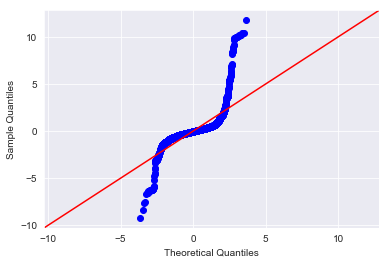

In [38]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

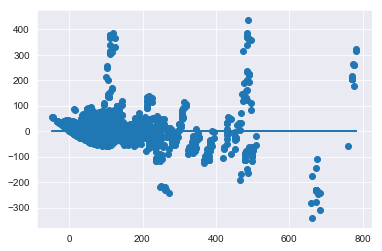

In [39]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

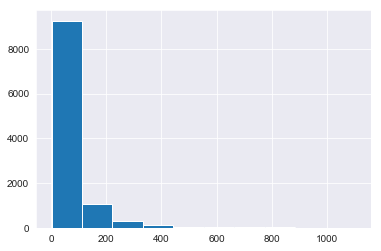

In [40]:
df.list_price.hist()

In [41]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [42]:
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     449.9
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:41:07   Log-Likelihood:                -4927.5
No. Observations:                8067   AIC:                             9965.
Df Residuals:                    8012   BIC:                         1.035e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4050      0.014    251.478      0.000       3.378       3.432
piece_count                                          0.6351      0.010     62.871      0.000       0.615       0.655
num_reviews                                         -0.0354      0.008     -4.517      0.000      -0.051      -0.020
play_star_rating                                     0.1193      0.007     17.363      0.000       0.106       0.133
star_rating                                         -0.0587      0.009     -6.857      0.000      -0.075      -0.042
val_star_rating                                     -0.1178      0.008    -15.464      0.000      -0.133      -0.103
ages_10_21                                           0.7083      0.041     17.163      0.000       0.627       0.789
ages_11_16                                           0.1660      0.071      2.328      0.020       0.026       0.306
ages_12_16                                          -0.2165      0.085     -2.558      0.011      -0.382      -0.051
ages_14plus                                          0.3260      0.048      6.811      0.000       0.232       0.420
ages_2_5                                             0.4776      0.022     21.517      0.000       0.434       0.521
ages_5_12                                           -0.7544      0.032    -23.253      0.000      -0.818      -0.691
ages_6plus                                          -0.9217      0.072    -12.884      0.000      -1.062      -0.781
ages_6_12                                           -0.2250      0.019    -11.627      0.000      -0.263      -0.187
ages_7_12                                            0.0553      0.024      2.277      0.023       0.008       0.103
ages_7_14                                           -0.0699      0.021     -3.300      0.001      -0.111      -0.028
ages_8plus                                           0.5545      0.055     10.131      0.000       0.447       0.662
ages_8_12                                            0.1876      0.031      6.081      0.000       0.127       0.248
ages_8_14                                            0.2071      0.021     10.096      0.000       0.167       0.247
ages_9plus                                           0.1370      0.142      0.967      0.334      -0.141       0.415
ages_9_12                                            0.3633      0.074      4.907      0.000       0.218       0.508
theme_name_BOOST                                     0.9855      0.123      7.996      0.000       0.744       1.227
theme_name_Blues_Helicopter_Pursuit                  0.7240      0.108      6.715      0.000       0.513       0.935
theme_name_Carnotaurus_Gyrosphere_Escape 

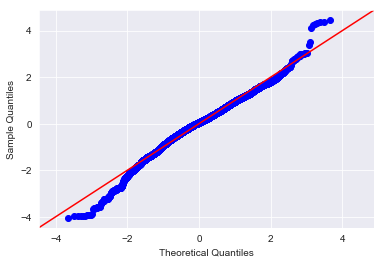

In [43]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

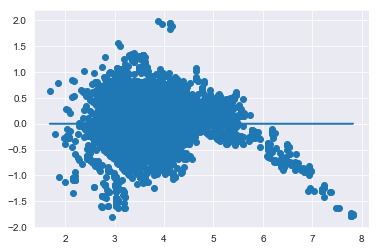

In [44]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [46]:
#No improvement on the homeosdacity

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


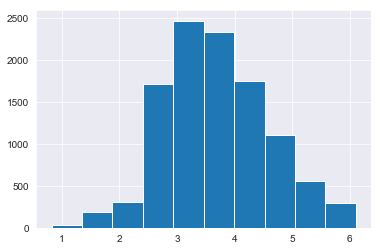

In [45]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [47]:
# An Alternative Approach: Building a Model From the Ground Up

In [48]:
x_cols = ['piece_count', 'country_US']

In [49]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     4455.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:45:56   Log-Likelihood:                -7549.4
No. Observations:                8067   AIC:                         1.510e+04
Df Residuals:                    8064   BIC:                         1.513e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7251      0.007    523.780      0.000       3.711       3.739
piece_count     0.7412      0.008     93.778      0.000       0.726       0.757
country_US     -0.2618      0.028     -9.374      0.000      -0.317      -0.207
==============================================================================
Omnibus:                      369.888   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.613
Skew:                          -0.463   Prob(JB):                    2.15e-106
Kurtosis:                       3.769   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

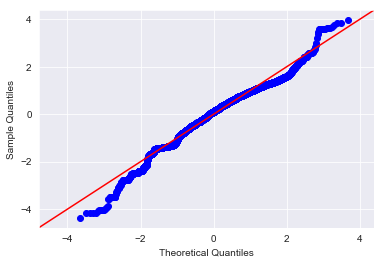

In [50]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

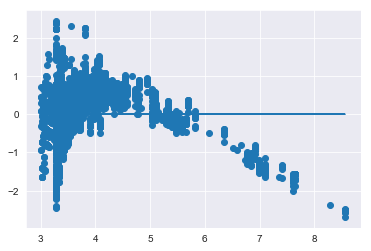

In [51]:
# Comment: Certainly not as strong a model, but with only 2 features, 
# over half the model performance was recovered.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 